Source: https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020

League of Legends (LoL) é um jogo multiplayer, modo arena de batalha, desenvolvido pela empresa Riot Games, onde o objetivo final é destruir a base inimiga e conquistar a vitória. Os meios de se sobrepor perante o inimigo e triunfar no campo de batalha são diversos e o jogo acaba por se tornar uma mistura entre habilidade individual e estratégia!

In [ ]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 Aug  9 16:46 .
drwxr-xr-x 1 root root 4096 Aug  9 16:18 ..
drwxr-xr-x 1 root root 4096 Aug  3 16:17 .config
drwxr-xr-x 2 root root 4096 Aug  9 16:46 lol_data
drwxr-xr-x 1 root root 4096 Jul 30 16:30 sample_data


In [ ]:
# Download do dataset (Kaggle)
!mkdir ~/.kaggle
!echo "{\"username\":\"talesaraujo\",\"key\":\"024f5f9f5b3576f9fb14e076d58062b7\"}" > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download gyejr95/league-of-legends-challenger-ranked-games2020

 39% 5.00M/12.7M [00:01<00:01, 4.21MB/s]
100% 12.7M/12.7M [00:01<00:00, 10.1MB/s]
league-of-legends-challenger-ranked-games2020.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip league-of-legends-challenger-ranked-games2020.zip -d lol_data
!rm league-of-legends-challenger-ranked-games2020.zip

Archive:  league-of-legends-challenger-ranked-games2020.zip
replace lol_data/Challenger_Ranked_Games.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: lol_data/Challenger_Ranked_Games.csv  
  inflating: lol_data/GrandMaster_Ranked_Games.csv  
  inflating: lol_data/Master_Ranked_Games.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

pd.set_option('display.max_columns', None)

DATAPATH = 'lol_data'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
c_df = pd.read_csv(f'{DATAPATH}/Challenger_Ranked_Games.csv')
gm_df = pd.read_csv(f'{DATAPATH}/GrandMaster_Ranked_Games.csv')
m_df = pd.read_csv(f'{DATAPATH}/Master_Ranked_Games.csv')

In [ ]:
challenger_series = pd.Series(['challenger' for i in range(c_df.shape[0])])
grandmaster_series = pd.Series(['grandmaster' for i in range(gm_df.shape[0])])
master_series = pd.Series(['master' for i in range(m_df.shape[0])])

In [ ]:
c_df['ranking'] = challenger_series
gm_df['ranking'] = grandmaster_series
m_df['ranking'] = master_series

In [ ]:
frames = [c_df, gm_df, m_df]

df = pd.concat(frames)
df.reset_index(inplace=True, drop=True)

In [ ]:
df.rename(columns={"gameDuraton": "gameDuration"}, inplace=True)

# Adding a column to keep track of game duration in minutes
df.insert(loc=2, column='gameDurationMins', value=round(df['gameDuration']/60))

rankings = df['ranking']
df.drop(labels=['ranking'], axis=1, inplace=True)
df.insert(1, 'ranking', rankings)

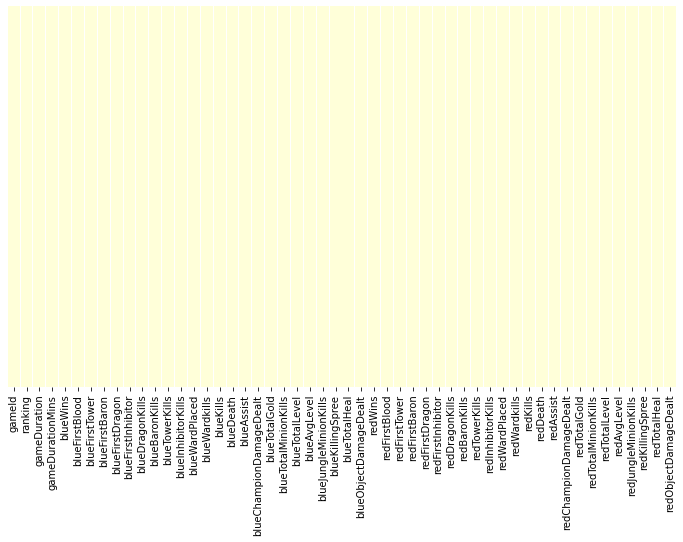

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [ ]:
df.head(5)

,gameId,ranking,gameDuration,gameDurationMins,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,challenger,1323,22.0,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675,1,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,challenger,1317,22.0,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303,0,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,challenger,932,16.0,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651,1,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,challenger,2098,35.0,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,challenger,2344,39.0,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287,0,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.0,227,7,86431,64141


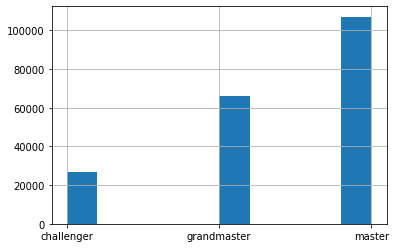

In [ ]:
df['ranking'].hist()

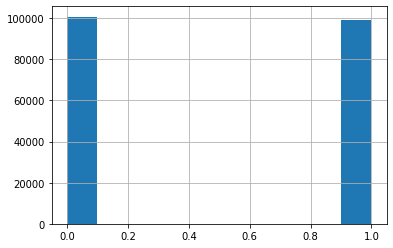

In [ ]:
df['blueWins'].hist()

In [ ]:
# plt.figure(figsize=(10, 5))
# sns.distplot(df['gameDurationMins'], hist=True, kde=False)
# plt.xlabel("Number of games")
# plt.ylabel("Game Duration (mins)")

In [ ]:
df['ranking'].value_counts()

master         107125
grandmaster     65896
challenger      26904
Name: ranking, dtype: int64

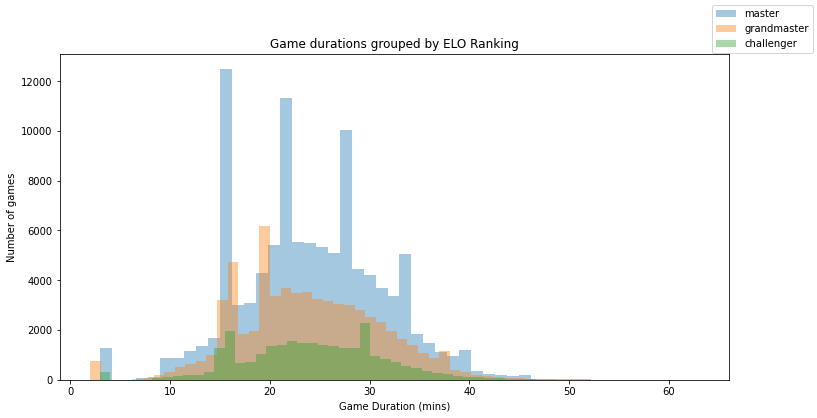

In [ ]:
rankings = ['master', 'grandmaster', 'challenger']
game_durations_by_ranking = [df[df['ranking'] == rank]['gameDurationMins'] for rank in rankings]

fig, ax = plt.subplots(figsize=(12, 6))
ax.set(ylabel='Number of games')
for i, game in enumerate(game_durations_by_ranking):
    sns.distplot(game, hist=True, kde=False, axlabel="Game Duration (mins)", label=rankings[i])
ax.set_title("Game durations grouped by ELO Ranking")
fig.legend()
plt.show()

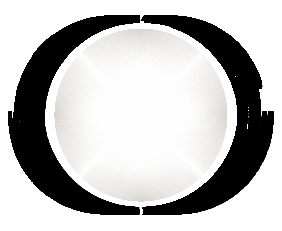

In [15]:
df['blueWins'].plot.pie()

In [16]:
df['']

KeyError: ignored

In [ ]:
columns = ['redWins', 'blueWins']

win_mapping = {0: "DEFEAT", 1: "WIN"}

for col in columns:
    df[col]= df[col].map(win_mapping)

In [ ]:
sns.countplot(x=df['ranking'], hue=df['blueWins'], palette="Set1")

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df['gameDurationMins'], y=df['blueAvgLevel'], hue=df['blueWins'], palette="RdYlGn")

In [ ]:

df = df[df['blueAvgLevel'] <= 18]
df = df[df['redAvgLevel'] <= 18]

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df['gameDurationMins'], y=df['blueAvgLevel'], hue=df['blueWins'], palette="RdYlGn")

In [ ]:
df['redWins']

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df['gameDurationMins'], y=df['redAvgLevel'], hue=df['redWins'], palette="Pastel2")

In [ ]:
blue_f_baron = df.groupby('blueFirstBaron')['blueWins'].value_counts()
blue_f_baron

In [ ]:
# Teams that claimed baron defeat and have actually won the match
blue_f_baron[1].plot.pie(autopct='%1.1f%%')

In [ ]:
red_f_baron = df.groupby('redFirstBaron')['redWins'].value_counts()
red_f_baron

In [ ]:
# Teams that claimed baron defeat and have actually won the match
red_f_baron[1].plot.pie(autopct='%1.1f%%')

In [ ]:
columns = ['redWins', 'blueWins']

inv_win_mapping = {v: k for k, v in win_mapping.items()}

for col in columns:
    df[col] = df[col].map(inv_win_mapping)

In [ ]:
blue_first_columns = ['blueWins', 'blueFirstBlood', 'blueFirstTower', 'blueFirstDragon', 'blueFirstBaron', 'blueFirstInhibitor']

blue_amount_columns = [
    'blueWins', 'blueKills', 'blueDeath', 'blueAssist', 'blueTowerKills', 'blueInhibitorKills', 'blueDragonKills', 'blueBaronKills',  'blueWardPlaced', 
    'blueWardkills', 'blueChampionDamageDealt', 'blueObjectDamageDealt', 'blueTotalGold', 'blueTotalMinionKills',  'blueTotalLevel', 'blueJungleMinionKills', 
    'blueKillingSpree', 'blueTotalHeal', 
] 

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix for winning a game by first acquiring goals (blue side)")
data = df[df['ranking'] == 'challenger'][blue_first_columns]
sns.heatmap(data.corr(method='pearson'), annot=True, fmt=".2f", cmap="RdYlGn")

In [ ]:
plt.figure(figsize=(15, 12))
data = df[df['ranking'] == 'challenger'][blue_amount_columns]
sns.heatmap(data.corr(method='pearson'), annot=True, fmt=".2f", cmap="RdYlGn")

In [ ]:
red_first_columns = ['redWins', 'redFirstBlood', 'redFirstTower', 'redFirstDragon', 'redFirstBaron', 'redFirstInhibitor']

red_amount_columns = [
    'redWins', 'redKills', 'redDeath', 'redAssist', 'redTowerKills', 'redInhibitorKills', 'redDragonKills', 'redBaronKills',  'redWardPlaced', 
    'redWardkills', 'redChampionDamageDealt', 'redObjectDamageDealt', 'redTotalGold', 'redTotalMinionKills',  'redTotalLevel', 'redJungleMinionKills', 
    'redKillingSpree', 'redTotalHeal', 
]

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix for winning a game by first acquiring goals (red side)")
data = df[red_first_columns]
sns.heatmap(data.corr(method='pearson'), annot=True, fmt=".2f", cmap="RdYlGn")

In [ ]:
plt.figure(figsize=(15, 12))
data = df[red_amount_columns]
sns.heatmap(data.corr(method='pearson'), annot=True, fmt=".2f", cmap="RdYlGn")

In [ ]:
np.logical_and(df['gameDurationMins'] < 20, df['redFirstBaron'] == 1).value_counts()

In [ ]:
np.logical_and(df['gameDurationMins'] < 20, df['blueBaronKills'] == 1).value_counts()